## Dimensionality Reduction: Principal Component Analysis in-depth

Here we'll explore Principal Component Analysis, which is an extremely useful linear dimensionality reduction technique.

We'll start with our standard set of initial imports:<!-- TEASER_END -->



In [3]:
from __future__ import print_function, division

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting style defaults
import seaborn as sns; sns.set()

## Introducing Principal Component Analysis

Principal Component Analysis is a very powerful unsupervised method for dimensionality reduction in data. It's easiest to visualize by looking at a two-dimensional dataset:

(200, 2)


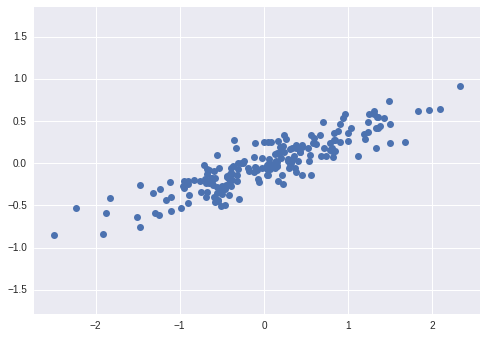

In [13]:
np.random.seed(1)
X = np.dot(np.random.random(size=(2, 2)), np.random.normal(size=(2, 200))).T
plt.plot(X[:, 0], X[:, 1], 'o')
plt.axis('equal')
print(X.shape)

We can see that there is a definite trend in the data. What PCA seeks to do is to find the Principal Axes in the data, and explain how important those axes are in describing the data distribution:

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_)
print(pca.components_)

[ 0.75871884  0.01838551]
[[ 0.94446029  0.32862557]
 [ 0.32862557 -0.94446029]]


To see what these numbers mean, let's view them as vectors plotted on top of the data:

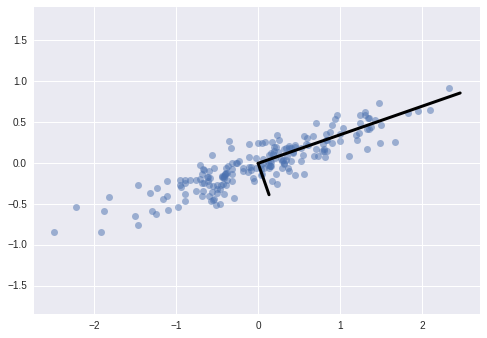

In [11]:
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.5)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3)
plt.axis('equal');

Notice that one vector is longer than the other. In a sense, this tells us that that direction in the data is somehow more "important" than the other direction. The explained variance quantifies this measure of "importance" in direction.

Another way to think of it is that the second principal component could be completely ignored without much loss of information! Let's see what our data look like if we only keep 95% of the variance:

In [12]:
clf = PCA(0.95) # keep 95% of variance
X_trans = clf.fit_transform(X)
print(X.shape)
print(X_trans.shape)

(200, 2)
(200, 1)


By specifying that we want to throw away 5% of the variance, the data is now compressed by a factor of 50%! Let's see what the data look like after this compression:

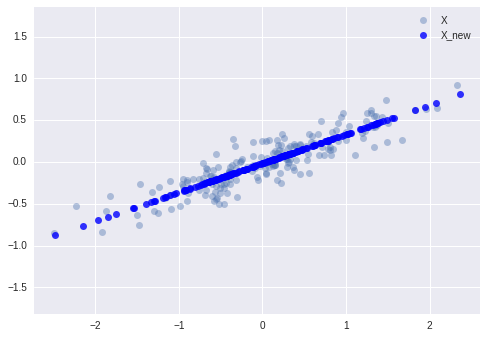

In [18]:
X_new = clf.inverse_transform(X_trans)
x_plot = plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.4, label='X')
xnew_plot = plt.plot(X_new[:, 0], X_new[:, 1], 'ob', alpha=0.8, label='X_new')
plt.axis('equal')
plt.legend()

The light points are the original data, while the dark points are the projected version. We see that after truncating 5% of the variance of this dataset and then reprojecting it, the "most important" features of the data are maintained, and we've compressed the data by 50%!

This is the sense in which "dimensionality reduction" works: if you can approximate a data set in a lower dimension, you can often have an easier time visualizing it or fitting complicated models to the data.

## What do the Components Mean?
PCA is a very useful dimensionality reduction algorithm, because it has a very intuitive interpretation via eigenvectors. The input data is represented as a vector: If we reduce the dimensionality in the pixel space to (say) 6, we recover only a partial image.

In [33]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target

What PCA does is to choose optimal basis functions so that only a few are needed to get a reasonable approximation. The low-dimensional representation of our data is the coefficients of this series, and the approximate reconstruction is the result of the sum:

### Choosing the Number of Components
But how much information have we thrown away? We can figure this out by looking at the explained variance as a function of the components:

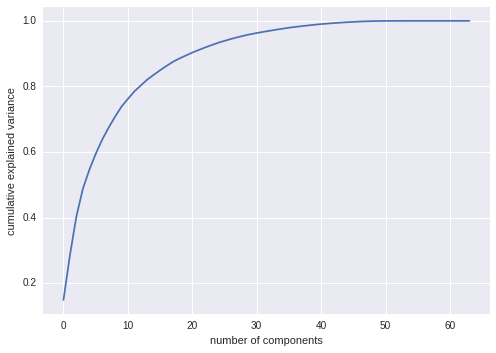

In [35]:
sns.set()
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Here we see that our two-dimensional projection loses a lot of information (as measured by the explained variance) and that we'd need about 20 components to retain 90% of the variance. Looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present in multiple observations.